## Bài toán dự đoán giá nhà
- Đưa vào các thuộc tính căn nhà dự đoán giá (price)

### Bài tập
- Tiền xử lý dữ liệu cho trước: dữ liệu dự đoán giá nhà (xem thêm tại https://www.kaggle.com/harlfoxem/housesalesprediction)
- Xây dựng và đánh giá các mô hình KNN, Random Forest, Linear Regression, Ridge, Lasso
- Lựa chọn các siêu tham số cho từng mô hình
- So sánh các mô hình với nhau

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('kc_house_data.csv')
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<Axes: >

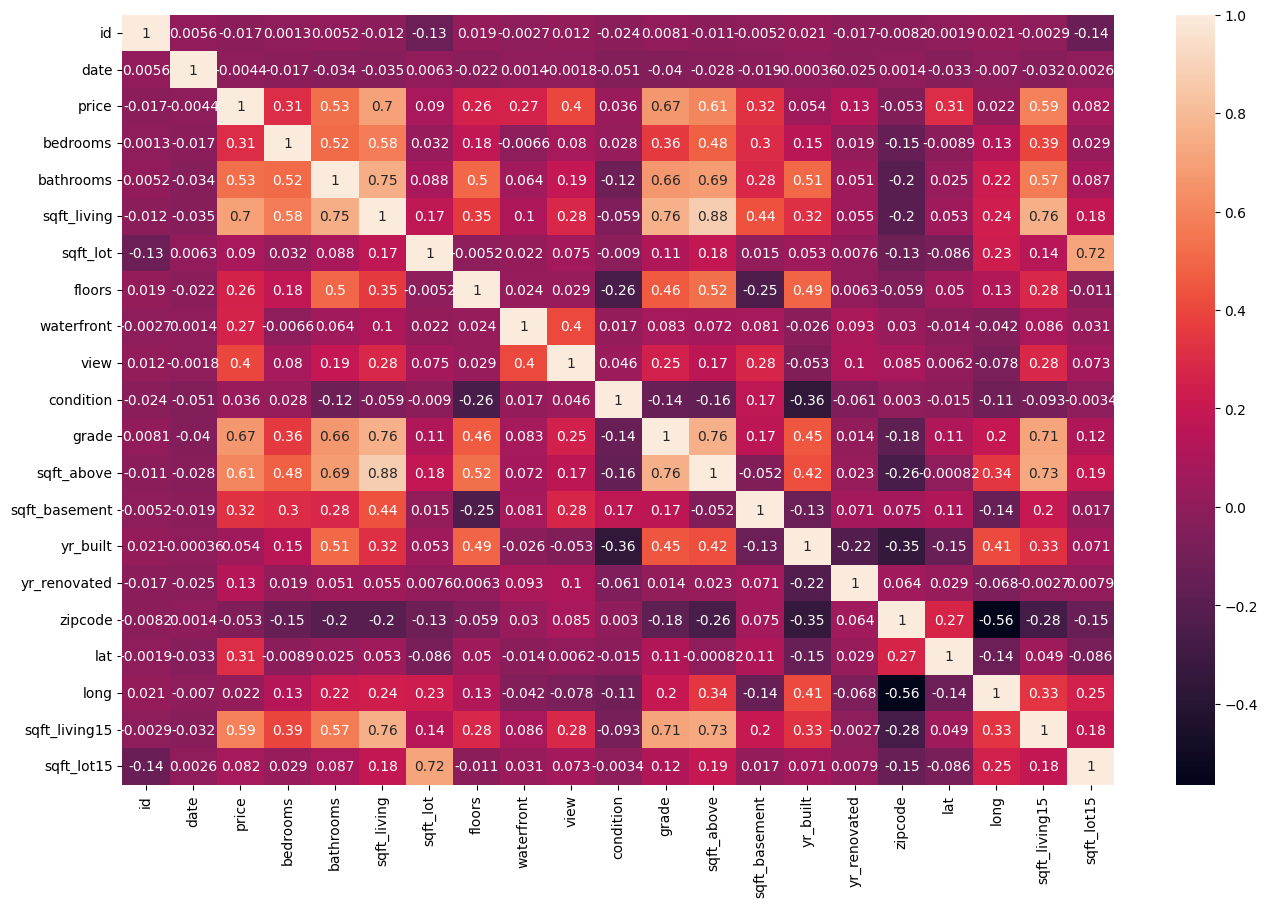

In [6]:
#Preprocessing
dataset['date'] = pd.to_datetime(dataset['date'])
plt.figure(figsize=(16,10))
sns.heatmap(dataset.corr(), annot=True)


In [7]:
#loại bỏ cột k cần thiết
dataset.drop(columns = ["date", "sqft_lot", "condition", "waterfront", "long", "zipcode", "sqft_lot15", "id"], inplace = True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,7,1180,0,1955,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,7,2170,400,1951,1991,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,6,770,0,1933,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,7,1050,910,1965,0,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,8,1680,0,1987,0,47.6168,1800


In [9]:
#Tạo tập train, test
from sklearn.model_selection import train_test_split

X = dataset.drop(columns = ["price"])
y = dataset["price"]
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=42,train_size=0.3)


In [21]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
rf = RandomForestRegressor()  
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
rf.score(x_test, y_test)

0.7775298258830246

In [25]:
#Linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test,y_test)

0.6677269197869569

In [10]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()  
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
knn.score(x_test, y_test)

0.0038995373430270983

In [12]:
#RIDGE
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
mean_squared_error(y_pred_ridge, y_test)

np.float64(47360481402.30114)

In [14]:
#LASSO
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
mean_squared_error(y_pred_lasso, y_test)
lasso.score(x_test, y_test)

0.6677757635307231

In [31]:
#Lựa chọn siêu tham số + so sánh score
from sklearn.model_selection import GridSearchCV

#Ridge
param_grid_ridge = {"alpha": [0.1, 1.0, 2.0, 5.0, 10.0]}
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5)
grid_search_ridge.fit(x_train, y_train)
print(f"Best params of Ridge: {grid_search_ridge.best_params_}")
#Lasso
param_grid_lasso = {"alpha": [0.1, 1.0, 2.0, 5.0, 10.0]}
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_search_lasso.fit(x_train, y_train)
print(f"Best params of lasso: {grid_search_lasso.best_params_}")
#Linear regression -> k có siêu tham số
# print(f"Best score of linear regression: {reg.score(x_test, y_test)}")
#Random Forest
param_grid_rf= {
    'n_estimators': [1, 2, 5, 10, 20],  
    'max_depth': [10, 20],      
           
    'bootstrap': [True, False]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_rf.fit(x_train, y_train)
best_params_rf = grid_search_rf.best_params_
print(f"Best params of rf: {best_params_rf}")
#KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'], 
    'p': [1, 2] } 
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(x_train, y_train)
print(f"Best params of knn: {grid_search_knn.best_params_}")


Best params of Ridge: {'alpha': 0.1}


c:\Users\phan\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.210e+13, tolerance: 6.204e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\phan\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.211e+13, tolerance: 6.204e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\phan\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.211e+13, toleranc

Best params of lasso: {'alpha': 0.1}
Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\phan\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(
c:\Users\phan\miniconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best params of rf: {'bootstrap': True, 'max_depth': 10, 'n_estimators': 1}
Best params of knn: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
